# Monte Carlo Methods and Minimization

Name: Manav Bilakhia

Date: 27th September 2022

## Library Imports Go Here

In [37]:
import math
import numpy as np
import matplotlib.pyplot as plt
import time
import statistics
import random
from time import sleep
import scipy
import pandas as pd

## Integration via Monte Carlo

### The Function

<font color = blue>
Construct a function that implements the Monte Carlo method of integration.  It should take as inputs the function $F$, the upper and lower limits of integration ($x_0$, $x_f$), the number of "darts" to be thrown $N$, and the height of the box $h$.

In [38]:
def monte_carlo_integration(F, x0,xf,N,h):
    m = 0
    xcords =[]
    ycords =[]
    for i in range(N):
        xcords.append(random.uniform(x0, xf)) #generating random values of x in the given limits(box)
        ycords.append(random.uniform(0, h)) #generating random values of x in the given limits(box)
    for j in range (N):
        if ycords[j] < F(xcords[j]): #checking if the random vlue is over or under the curve
            m = m+1
    return (m/N)*(xf-x0)*h #area under the box* probability
    
def f(x): #test
    return x**2
monte_carlo_integration(f,0,10,144000,100)

332.77777777777777

The above function approximates the area under a curve using the monte-carlo method. it take a very high value of N to get the correct value to the nearest units place.


### Testing the Function

<font color = blue>
We will be testing the code on the function

$$
f(x) = \frac{x^2}{2}
$$

that we have now used several times, integrating over the familiar range $[-1, 3]$.

Begin by plotting the function over the integration region, and determining what an appropriate choice of "h" should be.

Now, because of the use of random numbers, the result of a Monte Carlo method calculation will vary slightly each time it's run.  Create an array of 10 separate outputs for the function, with N = 100.  Then repeat this with N = 1000, N = 10000, N = 100000, and N = 1000000.  (You may want to estimate how long this last one will take before executing it.)

0.007651805877685547
0.7651805877685547


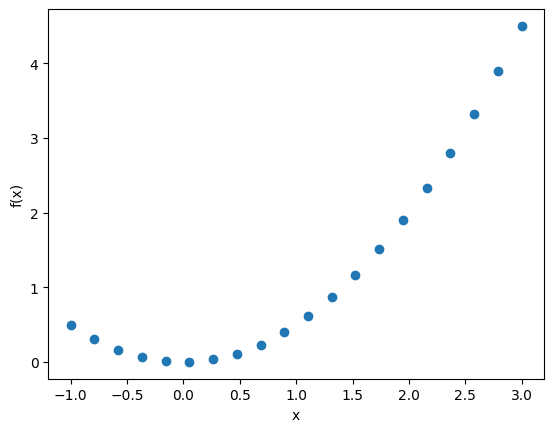

In [39]:
def b(x): #math funtion for testing
    return (x**2)*0.5
xcords = np.linspace(-1, 3, 20)
ycords = np.array([b(x) for x in xcords])
start4 =time.time()
monte_carlo_integration(b,-1,3,10000,4.5)
end4 = time.time()
total4 = end4-start4
plt.scatter(xcords,ycords)
plt.xlabel("x")
plt.ylabel("f(x)")
print(total4)
print(100*total4)

In [40]:
N1 = []
N2 = []
N3 = []
N4 = []
N5 = []
for i in range(10):
    N1.append(monte_carlo_integration(b,-1,3,100,4.5))
    N2.append(monte_carlo_integration(b,-1,3,1000,4.5))
    N3.append(monte_carlo_integration(b,-1,3,10000,4.5))
    N4.append(monte_carlo_integration(b,-1,3,100000,4.5))
    N5.append(monte_carlo_integration(b,-1,3,1000000,4.5))
print(N1)
print(N2)
print(N3)
print(N4)
print(N5)

[4.5, 4.5, 4.140000000000001, 4.140000000000001, 4.68, 5.3999999999999995, 4.5, 4.32, 3.2399999999999998, 5.22]
[4.554, 4.878, 4.626, 4.95, 4.986000000000001, 4.788, 4.3919999999999995, 4.662, 4.626, 4.536]
[4.631399999999999, 4.6332, 4.7808, 4.7700000000000005, 4.7664, 4.5342, 4.7448, 4.5864, 4.5935999999999995, 4.734]
[4.66236, 4.63266, 4.642200000000001, 4.65516, 4.716, 4.616280000000001, 4.66326, 4.6519200000000005, 4.6539, 4.576499999999999]
[4.674402, 4.658058, 4.666049999999999, 4.665888, 4.6566, 4.656996, 4.669776, 4.66623, 4.6587060000000005, 4.661873999999999]


We first start plotting the curve itself to find an optimal x_0 value to start with.We chose the value of x_0 to be 4.5. We then estimated the amount of time it would take to run the code with a value of N = 1000000 by computing the time it would take to run for N = 1000. We estimated the time to be 0.7051706314086914.

## Basic Rutherford Scattering

<font color = blue>
In Rutherford scattering (non-dimensionalized) we assume we begin with a uniform beam of particles of total radius $B$, all at the same speed $v_0 = 1$.  Each particle in the beam can be described by its impact parameter $b$, which determines at what angle $\Theta$ it will strike the detector:

$$
b = \cot\frac{\Theta}{2}, \hspace{.5in} \Theta = 2\cot^{-1} b
$$

The full beam will generate a distribution of strikes that \emph{should} follow the pattern

$$
N(\Theta) \, d\Theta = \frac{N}{B^2} \frac{\cos\frac{\Theta}{2}}{\sin^3\frac{\Theta}{2}} \, d\Theta = \mbox{number of strikes in the range $[\Theta, \Theta + d\Theta]$}
$$

### The Incoming Beam

<font color = blue>
Create a function that generates a simulation of a uniform beam of particles, with two inputs: the radious of the beam and the total number of particles in the beam.  The output should be a list of impact parameters.  Test your module by creating a histogram of the impact parameters of 100000 particles, where the beam radius is $B = 1$.  (The command "hist" in matplotlib.pyplot is what you're looking for.)

Make a detailed, quantitative argument for what the shape of the histogram \emph{should} be, and compare this with the histogram you obtained.  This argument should incorporate the effects of the "bin size" as well as the total number of particles.  



Hint: consider a thin annulus inside the beam of particles, with some inner radius $r$ and some width $w$.  How many particles do you expect to pass through it?

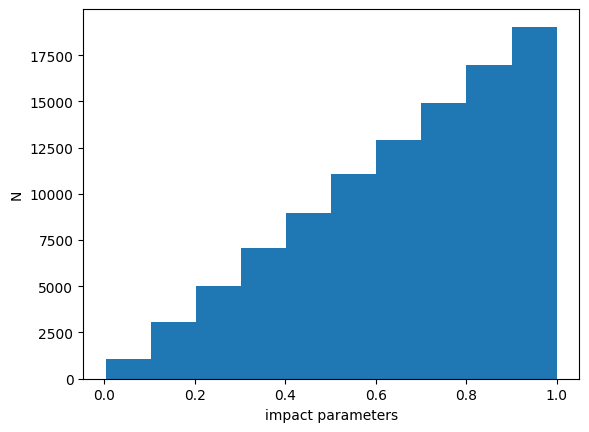

In [41]:
def monte_carlo_sim(B,N):
    origin = [0,0] 
    impact_params = np.zeros(N) #list of impace parameters
    i = 0
    while impact_params[N-1]==0:
        x = random.uniform(-B, B) #random values in the range of |radius of the beam|
        y = random.uniform(-B, B) #random values in the range of |radius of the beam|
        coord = [x,y]
        if math.dist(origin, coord) <=B: # checking if the te random point falls within the area of the beam
            impact_params[i] = math.dist(origin, coord) # appending it to the list if it is in the beam.
            i+=1
    return impact_params
dataset = monte_carlo_sim(1,100000)
#xvals = np.array([random.uniform(0, 1) for i in range(100000)])
#yvals = np.array([2*100000*x/1 for x in xvals])
#plt.scatter(xvals, yvals)
plt.hist(dataset)
plt.xlabel("impact parameters")
plt.ylabel("N")
plt.show()

Assuming that the particles in the beam will have the same velocity, we know that the number of particles per unit cross sectional area of beam is given by

$\frac{N}{\pi B^2}$

As the particles scatter through a gold nucleus and hit the detector, (assuming the detector is a sphere with radius R), we know that the distribution formed would depend on $\Theta$ which would be equal to the final scattering angle of the particles.

We know that 

$N(\Theta)d \Theta = $ to the number of strikes in a region [$\Theta, \Theta + d\Theta$]

All particles that strike in this above mentioned region must begin in a particular annular region of the beam described by $[b, b+db]$ where $b$ is the impact parameter. 

A narrow annulus of this type will have the cross section area of $2\pi b db$, therefore we can write 

$N(\Theta)d\Theta = \frac{N}{\pi B^2}2\pi b db$

which we can simplify to 

$N(\Theta)d\Theta = \frac{2N}{B^2}2 b db$

Here we see that N is directly proportional to b. Hence theoretically we can predict the histogram to look like a ladder such that there are more particles as the value of the impact parameters increase. We should expect close to 0 particles being in the very first bin. Let us consider each bin to represent a thin annulus inside the beam of particles, with some inner radius 𝑟 and some width 𝑤. When we calculate the surface area of these annulus we see that the surface area is directly proportional to the increase in radius at a constant width. This increase in area increases the probability of particles to pass through the outer annulus more than the ones on the inner side thereby making the outermost annulus having the most number of particles and the inner most having the least particles. 

On comparing the theoretical shape described above along with the actual shape of the histogram, we do see all the features described, although if we increase the binning without increasing the input value of N in the beam, our theoretical and actual values would be very different. 

### * The Outgoing Distribution

<font color = blue>
Now create a function that uses the previous function to generate a list of final angles from a simulated Rutherford experiment.  This function should take the same inputs as the previous function: the radius of the incoming beam and the total number of particles.  Test the function with 100000 incoming particles and an incoming beam radius of $B = 10$, and compare the shape of the histogram with the theoretical shape, including the minimum angle of scattering, and taking into account bin size and total number of particles.  Include in your final plot both the histogram and the theoretical curve.

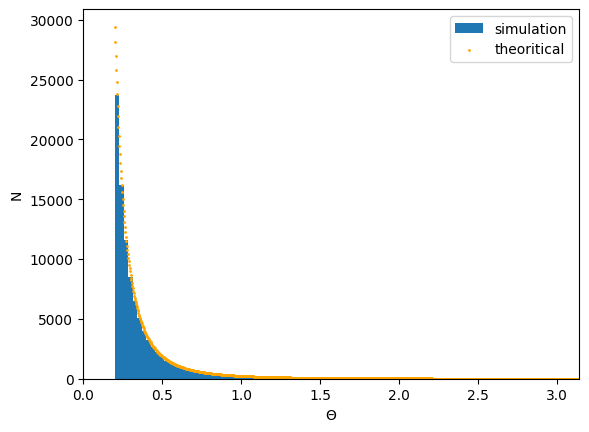

In [42]:
def outgoing(B,N): # function for the outgoing beam
    theta = np.array(monte_carlo_sim(B, N)) # gettiung impact params from the simulator
    theta = 2*(np.arctan(1/theta)) #calculating the values of theta for each given impact params
    return theta
def theory(B,N): # funciton to plot the theoritical data
    theta = np.linspace(0.2, math.pi, 1000)
    return ((N/(B**2))*((np.cos(theta/2))/((np.sin(theta/2))**3))*((math.pi-0.2)/100))

dataset = outgoing(10,100000)
dataset2 = theory(10,100000)
# print(dataset2)
plt.hist(dataset,bins = 100, label = "simulation")
plt.xlim(0,math.pi)

theta_vals = theta = np.linspace(0.2, math.pi, 1000)
plt.scatter(theta_vals, dataset2, color = "orange", s = 1, label  = "theoritical")
plt.xlabel("$\\Theta$")
plt.ylabel("N")
plt.legend()
plt.show()

I calculated the minimum scattering angle to be 0.2 using the equation  $\Theta = 2\cot^{-1} b$. This also suggests that the further away the particle is from the detector, the less it would scatter here approximately 0.2. The above graph plots the histogram of number of particles against the scattering angles. The less the scattering angle, the more events we have which also is in line with the theoretical curve shown in orange.

## Incoming Speed Modification

<font color = blue>
Now we want to modify the "beam" so that the particles in it have a range of speeds (non-dimensionalized) following the Gaussian distribution

$$
\mathcal{P}(v) \, dv = \frac{1}{\sigma\sqrt{2\pi}} \, e^{-\frac{(v - 1)^2}{2\sigma^2}} \, dv
$$

and examine what effect this has on the final distribution of angles.

### Gaussian Distribution of Speeds

<font color = blue>
Create a function to generate a set of incoming speeds that follow a Gaussian distribution.  Your function should take two inputs: the total number of speeds you want to generate, and the width $\sigma$ of the distribution.  It should also never allow a speed to be generated that is less than zero.  Test your function by generating a list of 100000 particle speeds, using $\sigma = .1$.  Plot the results as a histogram, and confirm that the shape is correct.

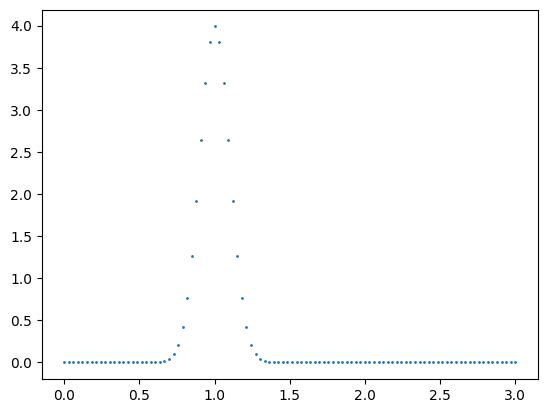

In [43]:
def particle_speed(v, sigma): #mathematical function for generate a set of incoming speeds that follow a Gaussian distribution
    return 1/(sigma*math.sqrt(2*math.pi))*math.exp(-(v - 1)**2/(2*sigma**2))   
xvals = np.linspace(0,3,100)
yvals = np.array([particle_speed(x,0.1) for x in xvals])
plt.scatter(xvals, yvals,s =1)
plt.show()

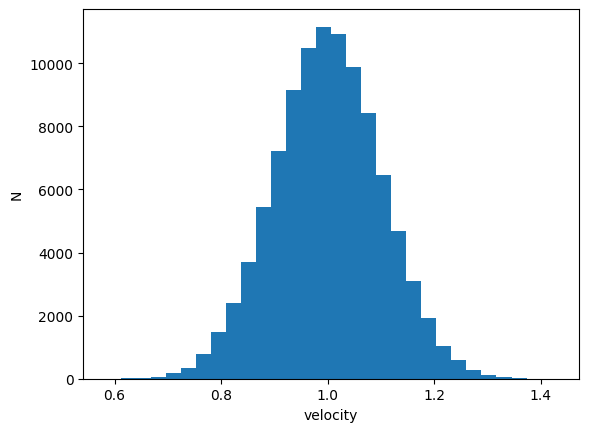

In [44]:
def gaus_speed(N, sigma): # this code take a lot of time to run, I was unable to optimize it 
    def particle_speed(v, sigma): #mathematical function for the speed
        return 1/(sigma*math.sqrt(2*math.pi))*math.exp(-(v - 1)**2/(2*sigma**2))
    speed_array = np.array([])
    while len(speed_array)<N: # we need N elements in the speed array
        xval = random.uniform(0, 3) # random value between 0 and a value more than f(x)
        yval = random.uniform(0, particle_speed(1,sigma))# random value between 0 and particle speed
        if yval<particle_speed(xval, sigma):
            speed_array = np.append(speed_array,xval)
    return (speed_array)
plt.hist(gaus_speed(100000, 0.1),bins = 30) #plotting the histogram
plt.xlabel("velocity")
plt.ylabel("N")
plt.show()

Here we see the different velocities for the particles. The shape of the histogram also looks like a Gaussian curve with most of the particles having the velocity, v = 1

### * Modifed Rutherford Distribution

<font color = blue>
Create a function that uses the previous functions for generating impact parameters and speeds to generate a list of final angles.  Test it out using 100000 particles, with a beam radius of 10 and $\sigma = 0.1$.  Show the resulting histogram together with the histogram where we assume all particles have the same speed.

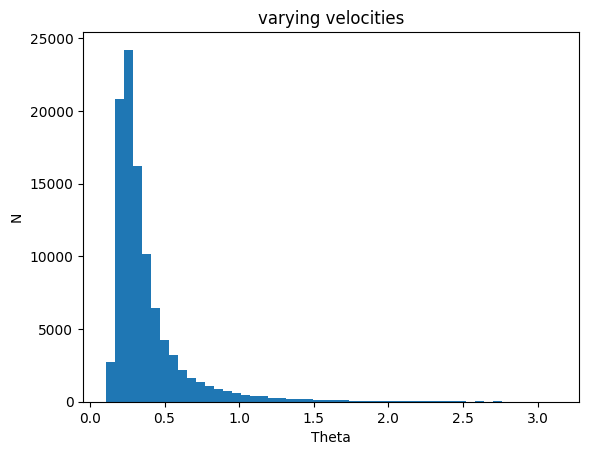

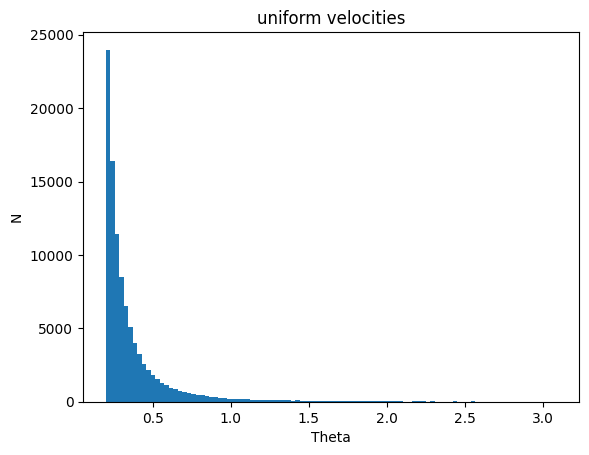

In [45]:
def modified_rutherford(B, N, sigma): # siumulating the rutherford experomnt for particles at  different soeeds inside the sdame beAM
    impact_params = np.array(monte_carlo_sim(B, N)) #ghetting impact params
    velocities = gaus_speed(N,sigma) # getting listg of speeds
    theta = 2* np.arctan(1/((velocities**2)*impact_params))# calculating theta for ewach speed and oimpact param
    return theta
plt.hist(modified_rutherford(10,100000, 0.1),bins = 50) #plotting the histogram
plt.title("varying velocities")
plt.xlabel("Theta")
plt.ylabel("N")
plt.show()

dataset = outgoing(10,100000)
plt.hist(dataset,bins = 100, label = "simulation")
plt.title("uniform velocities")
plt.xlabel("Theta")
plt.ylabel("N")
plt.show()

We first need to go from our non dimensionalized set of equation to dimensionalized set of equations 

$cot(\frac{\theta}{2}) = \frac{m v^2 b}{k}$

$\tilde{b} = \frac{m v_{0}^{2} b}{k}$

$\tilde{v} = v/v_{0}$

$ cot(\frac{\theta}{2} )= \tilde{v}^2 \tilde{b}$

$\theta = 2 cot^{-1}(\tilde{v}^2 b)$

On comparing the graph with same velocities and varying velocities, we see that events in the one with varying velocities are more spread out across different scattering angles than being more concentrated in the very first bin. Since some particles are very fast they tend to be deflected back at even higher angles whereas the particles at lower speed may fall off at lower angles. 

This also tells us that when we try to simulate data using a data generator, small changes in parameters can make huge differences in our simulated data just like in the Rutherford experiment, adding varying velocities. 

## Minimization Codes

### Fixed Number of Steps of Fixed Width

#### Stepping Code

<font color = blue>
Begin by writing a function which takes as inputs a function $F$, an initial value $x_0$, the number of steps to be taken $N$, and two small parameters $\epsilon$ and $\delta$ (the first for the numerical derivative, the second for the fixed step size).  Your function should output a list of $N$ values $F(x_k)$ as well as a list of $N$ values $x_k$.

In [46]:
def stepping (F, x0, N, epsilon, delta):
    F_x = []
    x = []
    for i in range (N):
        der = (F(x0 + epsilon) -F(x0))/epsilon #calculating the numerical derivative
        F_x.append(F(x0))
        x.append(x0)
        x0 = x0-((der/abs(der))*delta) #updating the initial value
    return x,F_x

The above function  takes in a mathematical function (it will also worked with badly behaved functions) and calculates the local minimum depending on the initial chosen value. 

#### Testing

<font color = blue>
We want to test this code on the function 
    $$F(x) = \frac{1}{x^2} - \frac{10}{x}e^{-x}$$
 Create the function, and plot it.  Use the plot to choose a good initial value $x_0$.

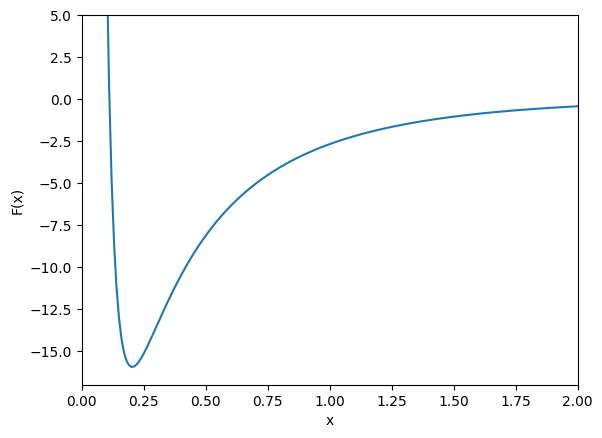

In [47]:
def test(x): #testing
    return ((1/x**2)-((10*(math.e**(-x)))/x))
x_values = np.linspace(0.0001, 2, 200)
y_values = np.array([test(x) for x in x_values])
plt.plot(x_values, y_values)
plt.xlim(0,2)
plt.ylim(-17,5)
plt.xlabel("x")
plt.ylabel("F(x)")
plt.show()

We First graph the function to find an initial starting point x_0 and then find the minimum. 

<font color = blue>
Then, run your function using $\epsilon = 10^{-6}$ and $\delta = 10^{-4}$, for a value of $N$ you choose.  Plot the results (you want to plot "$k$" vs. "$F(x_k)$").  Adjust your value of $N$ until it is optimal: your graph should more-or-less monatonically decrease until it reaches some value, and then essentially stay there.  You will want to make sure $N$ is large enough that the function has "bottomed out", but not unnecessarily large.

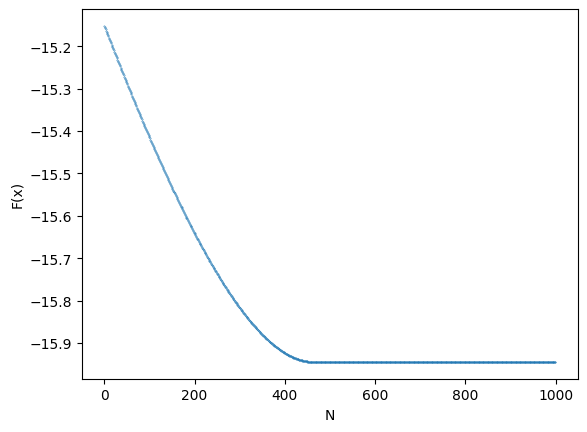

In [48]:
k, F_x = stepping(test, .25, 1000, 10**(-6),10**(-4))
xvalues =  np.array([x for x in range(len(k))])
plt.scatter(xvalues, F_x, s = 0.1)
plt.xlabel("N")
plt.ylabel("F(x)")
plt.show()

Here we see in the graph above that as N gets higher, we do get closer to the minimum but after a point (somewhere between N =400-425 on this graph), the graph seems to be a constant which means that this the the maximum accuracy we can get while finding the local minima. 

<font color = blue>
    Then, create second graph in which you "zoom in" on the later data points, so that you can see the results "rattling" around near the bottom of the potential.

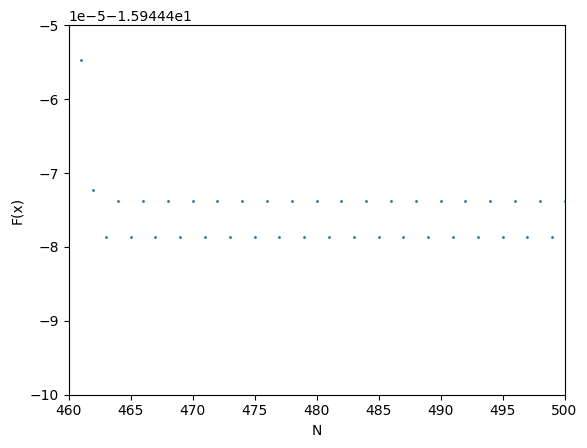

In [49]:
plt.scatter(xvalues, F_x, s = 1)
plt.ylim(-15.94450, -15.94445)
plt.xlim(460, 500)
plt.xlabel("N")
plt.ylabel("F(x)")
plt.show()

Although I said that the graph seems like it tends to a constant vale when zoomed out, We find otherwise when zoomed in. We see that after the plot reaches a particular value N, it keeps on oscillating between 2 values for any given value of N. This means that out method is constantly overshooting by the same amount and trying to correct itself by the same value thereby entering into this endless oscillating feature. 

### With Adaptive Stepping

#### Steppping Code

<font color = blue>
Now write a new version of the function which implements adaptive stepping, with a tolerance value used as the exit condition.  This time your code should take as inputs the tolerance parameter $\Delta$ (instead of $N$, the number of steps), the initial step size $\delta_0$ (instead of $\delta$, the fixed step size), and two parameters $\kappa_{+}$ and $\kappa_{-}$, which we will use to modify the value of $\delta$ after each step.  (It should also still take the function $F$ and the parameter $\epsilon$ associated with the numerical derivative as inputs).  In addition, modify the output of the function so it also includes a list of step sizes $\delta_k$.

<font color = blue>
You may want to do this in two stages: first, keep the number of steps fixed and just put in the adaption of step size.  Test the code to make sure it's working.  Then, make hte modification to use the tolerance $\Delta$ and an exit condition instead of $N$.

In [50]:
def adaptive_stepping(F, x0, Delta, delta_0, kappa_plus, kappa_minus, epsilon):
    F_x = []
    x = []
    del_k = []
    der = (F(x0 + epsilon) -F(x0))/epsilon #calculating the derivative 
    while abs(der)>Delta: #loop runs while the derivative is higher than the tolerance 
        der = (F(x0 + epsilon) -F(x0))/epsilon #calculating the derivative 
        F_x.append(F(x0)) #storing the y values
        x.append(x0)#storing the x values
        x1 = x0-((der/abs(der))*delta_0) # next x value
        if F(x1) <F(x0): # manipulating the next step value
            delta_0 = kappa_plus*delta_0
        else:
            delta_0 = kappa_minus*delta_0
        del_k.append(delta_0)
        x0 = x1
    return x, F_x, del_k

Earlier we saw that our method could not get any more accurate after a given value of N. In the code above, we have defined a much more adaptive method of stepping which uses derivatives to determine what the next step size should be instead of making it a constant step.

#### Testing

<font color = blue>
Test your new code with the same function F(x) as before.  Use the values $\kappa_{+} = 1.1$ and $\kappa_{-} = 0.5$, along with $\epsilon = 10^(-6)$ and $\delta_0 = 10^(-4)$.  Set your tolerance parameter to be $\Delta = 10^{-6}$.  Again, plot your result as $k$ vs. $F(x_k)$.  How does the number of steps required compare with your previous result?

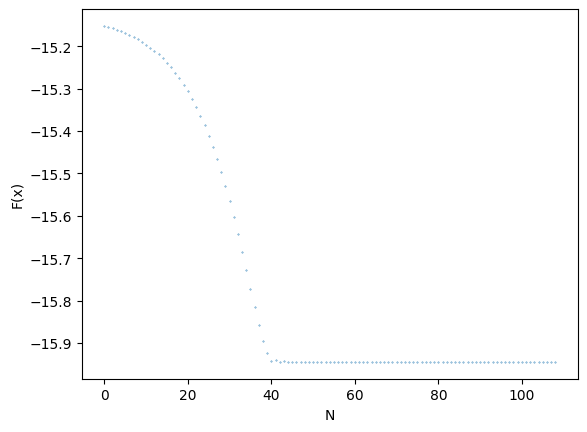

In [51]:
k, F_x,del_k = adaptive_stepping(test, .25, 10**(-6), 10**(-4),1.1,0.5,10**(-6))
xvalues =  np.array([x for x in range(len(k))])
plt.scatter(xvalues, F_x, s = 0.1)
plt.xlabel("N")
plt.ylabel("F(x)")
plt.show()

Although the graph above shows a similar feature just like the one which did not have adaptive stepping, this does seem to approach a constant value at around N = 40 instead of N> 400. This happens to be one of those few instances when the algorithm becomes accurate and faster in numerical methods at the same time.

<font color = blue>
    Again, create a second plot in which you "zoom in" on the later part of the graph.  How does the adaptive stepping fix the issue with the previous code?

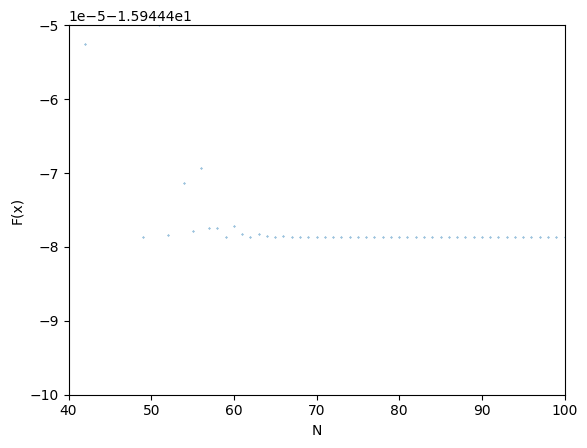

In [52]:
plt.scatter(xvalues, F_x, s = 0.1)
plt.ylim(-15.94450, -15.94445)
plt.xlim(40, 100)
plt.xlabel("N")
plt.ylabel("F(x)")
plt.show()

When we zoom in where the value seemed to approach a constant, we do see it oscillating a bit and because of our adaptive steeping we see that then oscillations do decrease as N increases. 

<font color = blue>
    Finally, create a plot of $k$ vs. $\delta_k$ to gain some insight into what the adaptive stepping is actually doing.  Why is the stepping code more efficient?  Why is it more accurate?  

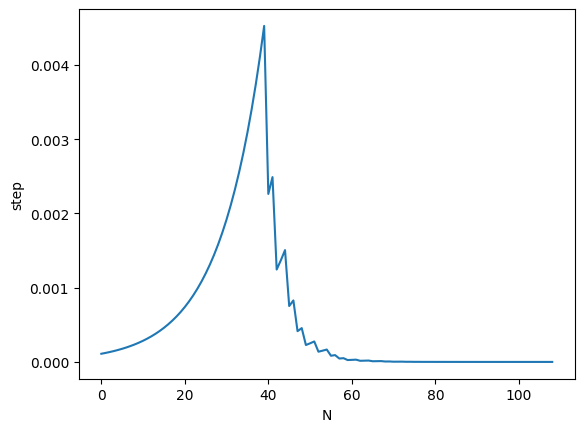

In [53]:
plt.plot(xvalues, del_k) # plotting N against the step
plt.xlabel("N")
plt.ylabel("step")
plt.show()

In the graph above, all the peaks represent every time out step overshot and the it\s corresponding correction using adaptive stepping. 

### Multi-Variable Functions

<font color = blue>
    now we want to try using the same method, but with a function of multiple variables.  We will assume an input of the form $F([x_1, x_2, \dots, x_k])$ (notice that "$F"$ has a single input, which is itself a list of values: this is easier to manipulate than if we assumed it was in the form $F(x_1, x_2, \dots, x_k)$, where "$F$" has multiple inputs.  (You can either use a numpy array, or a standard python list, but make sure whichever you use you are consistent with throughout the code)

#### Numerical Gradient Code

<font color = blue>
    We'll begin by writing a function which takes as input the function "$F"$ and a parameter "$\epsilon$", and a list of values "points" (in the form $[x_1, x_2, \dots, x_m]$), and outputs the numerical gradient:
    $$\Bigg\{\frac{F([x_1+\epsilon, x_2, \dots, x_m]) - F[x_1, x_2, \dots, x_m]}{\epsilon}, \frac{F([x_1, x_2 + \epsilon, \dots, x_m]) - F[x_1, x_2, \dots, x_m]}{\epsilon}, \dots, \frac{F([x_1, x_2, \dots, x_m + \epsilon]) - F[x_1, x_2, \dots, x_m]}{\epsilon}\Bigg\}$$
    Test your code on the function
    $$
    F(x, y, z) = x^2 + y^4 + z^6
    $$
    at the location $x = 1$, $y = 2$, $z = 3$.  (Compute the gradient analytically, and compare your result, using the value $\epsilon = 10^{-6}$.)

In [54]:
def gradient(F, epsilon, points):  # function to calculating the gradient 
    grad_arr = np.array([])
    for i in range (len(points)):
        evec = np.zeros(len(points)) 
        evec[i] = epsilon # creates a list of  0's wioth jjust one elemetn set to the valuie of epsilon
        grad_arr = np.append(grad_arr, (F(points+evec) - F(points))/epsilon) # calculating the gradient
    return grad_arr

def func(vector):#test
    return vector[0]**2+ vector[1]**4 +vector[2]**6

print(gradient(func, 10**(-6), [1,2,3]))

[   2.00000102   32.00002402 1458.00121516]


The above function calculates the gradient of a given function. Since we are not dealing with single variable functions, we cannot simply take the derivative of the function to determine whether it was a step in the correct or incorrect direction. We must now depend on the norm of the gradient of a function. 

#### Stepping Code

<font color = blue>
    Now we want to write a function which uses the adaptive stepping algorithm on a function of multiple variables.  The main difference to the code should be that instead of computing a numerical derivative, we use the previous code to compute a numerical gradient.  And instead of simply determining the sign of the numerical derivative, we find the unit vector in the direction of the gradient.  To do so, if you used a numpy array as your input you can use the built-in numpy function "numpy.linalg.norm()".  You should NOT have to rewrite your code to explicitly say that your locations $x_k$ are now actually arrays of numbers: if you simply use an input for $x_0$ that is itself an array of numbers, and that array of numbers is the right length to fit the function you are inputting, Python will take care of the rest...

In [55]:
def multi_var_adaptive_stepping(F, points, Delta, delta_0, kappa_plus, kappa_minus, epsilon):# writing adaptive stepping for multivariables 
    F_x = []
    x = []
    del_k = []
    #points = np.array(points)
    gradient_arr1 = gradient(F, epsilon, points) #calculate gradient for startinf condition
    #print (np.linalg.norm(gradient_arr))
    while np.linalg.norm(gradient_arr1)>Delta:# exit condition
        #print (np.linalg.norm(gradient_arr))
        gradient_arr1 = gradient(F, epsilon, points)
        F_x.append(F(points))
        x.append(points)
        points1 = np.array([])
        points1 = points - delta_0*(gradient_arr1)/np.linalg.norm(gradient_arr1)
        if F(points1) <F(points): # determining the correct step
            delta_0 = kappa_plus*delta_0
        else:
            delta_0 = kappa_minus*delta_0
        del_k.append(delta_0)
        points = points1
    return x, F_x, del_k

The concept behind the code above is based on the same concept of adaptive stepping that we wrote before. Instead of the function having a single variable, we can also have multi variable functions. The only difference is that instead of using derivatives to check the previous step, we now use the gradient of the function at that point.  

#### Testing

<font color = blue>
    We want to test the code on the function of two variables: 
    $$
    V(x, y) = x\sin(x)\sin(y) + y\sin(1.1x)\cos(1.1y)
    $$

<font color = blue>
     Begin by using matplotlib.pyplot.contourf to display the function as a contour plot.  (To do this you will first need to create a 2D array of values of the output of the function.  Then, you will need to create aditional 1D arrays of xvalues and yvalues.)

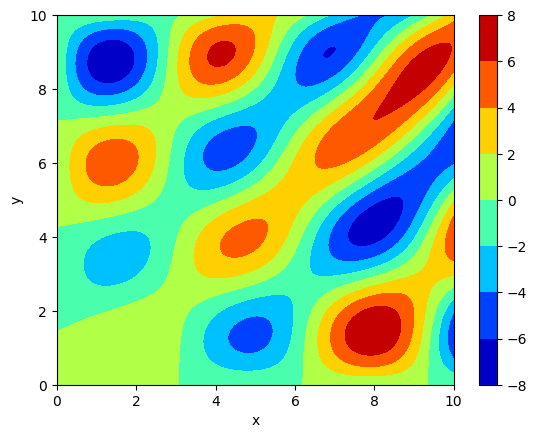

In [56]:
def V(points):# function to create a contour plot
    return points[0]*np.sin(points[0])*np.sin(points[1])+points[1]*np.sin(points[0]*1.1)*np.cos(points[1]*1.1)
xvalues = np.linspace(0,10, 1000)
yvalues = np.linspace(0,10, 1000)
X, Y = np.meshgrid(xvalues, yvalues) # 2D conversion
z  = V([X,Y]) 
cp = plt.contourf(X,Y,z, cmap = "jet") #contour plotting, jet is a color scheme
plt.colorbar(cp) # color bar to visualize the z axis
plt.xlabel("x")
plt.ylabel("y")
plt.show()

From the plot above, we see multiple minimums for the given function at approximately (1, 9, -8), (8,4,-8). These estimates would be a great starting point to test our multi-variable adaptive stepping. 

<font color = blue>
    Use this plot to identify a good initial location, and then apply your multi-variable adaptive stepping code.  Choose the input values $\epsilon = \Delta = 10^{-6}$, $\delta_0 = 10^{-4}$, $\kappa_{+} = 1.1$, and $\kappa_{-} = 0.5$.  Create a graph of $k$ vs. $V(\{x_k, y_k\})$ to see whether your method worked.  In addition, use the results of your stepping to find the best estimate for the location of the local minimum, and check this against your contour plot.  

<font color = blue>
Finally, repeat the process with a second initial location, to find a second local minimum.

-7.217295480855711


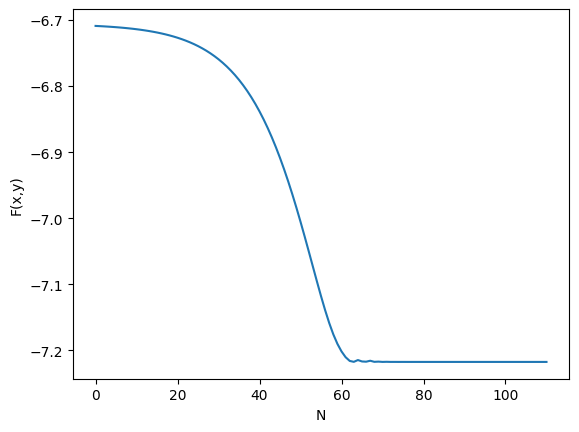

-7.721258219995276


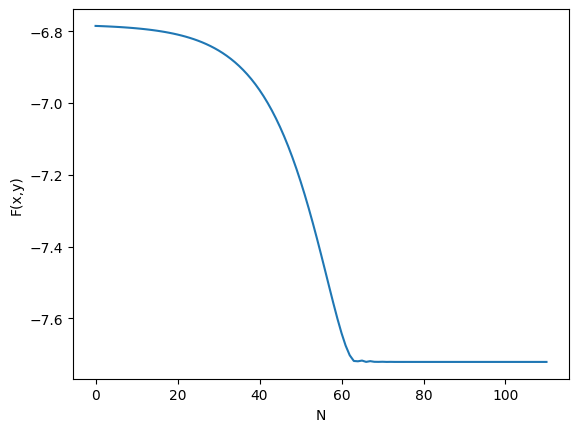

In [57]:
points1 = np.array([8,4])
a1,b1,c1 = multi_var_adaptive_stepping(V, points1, 10**(-6), 10**(-4), 1.1, 0.5, 10**(-6))
print(b1[-1]) # value of z

xvalues1 =  np.array([x for x in range(len(a1))])
plt.plot(xvalues1, b1) # plotting F(x) against N
plt.xlabel("N")
plt.ylabel("F(x,y)")
plt.show()


points2 = np.array([1,9])
a2,b2,c2 = multi_var_adaptive_stepping(V, points2, 10**(-6), 10**(-4), 1.1, 0.5, 10**(-6))
print(b2[-1]) # value of z

xvalues2 =  np.array([x for x in range(len(a2))])
plt.plot(xvalues2, b2) # plotting F(x) against N
plt.xlabel("N")
plt.ylabel("F(x,y)")
plt.show()


I found the first minimum to be at z = -7.217295480855711 and another minimum at z = -7.721258219995276. The above graphs show the variation with the z values vs the number of steps taken. 

## Fitting to a Mystery Data Set

### Import and Visual Assessment

<font color = blue>
    Import the data file (stored on Nexus) "fittingdata.csv", and create a plot to display it.  Based on its appearance, choose a generic fitting function with one or more free parameters.  (Hint: make sure you have enough free parameters to account for everything you see).  Choose initial estimates for these parameters.

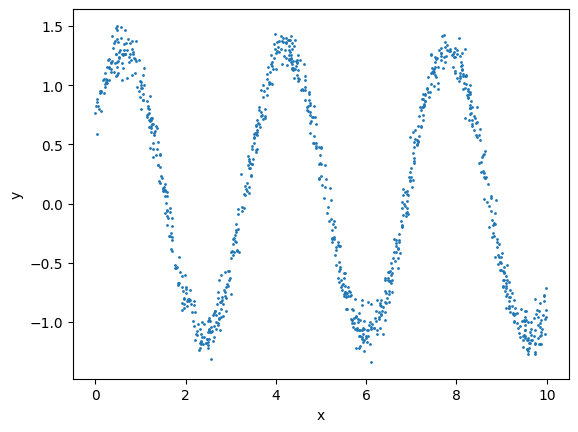

In [58]:
spreadsheet = pd.read_csv('/ManavData/college/Courses/PHY310/fittingdata.csv') #defining the dataset with its location
plt.scatter(spreadsheet.x, spreadsheet.y,s = 1)
plt.xlabel("x")
plt.ylabel("y")
plt.show() # 

plotting the dataset

### $\chi^2$ Minimization

<font color = blue>
    Create a function $\chi^2$ that depends on your fitting parameters, using this data set.  Then, use your multi-variable adaptive stepping code to minimize this function.  Find the "best fit" values of the parameters, together with the associated value of $\chi^2$.

In [59]:
def fitting_func1(x,a,b,c,d): # asin(bx+c)+d form
    return a*math.sin((b*x) + c)+d 

[1.20457094 1.7490588  0.49862617 0.09495196]


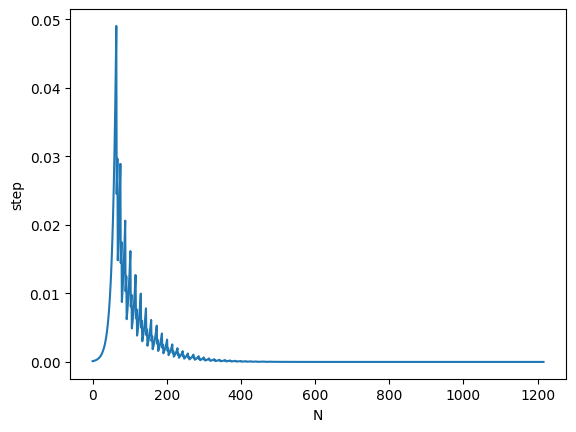

In [60]:
def fitting_func(x,points): # asin(bx+c)+d form function to be used for fitting
    return points[0]*math.sin((points[1]*x) + points[2])+points[3]
def chi_squared(points): # points[a,b,c,d]  function to calculate the value of chio squared
    total = 0
    y  =np.array(spreadsheet.y) # getting y values from the spreadsheet
    xvals = np.array(spreadsheet.x) # getting x values from the spreadsheet
    
    for i in range (len (y)):
        total = total+ (y[i]-fitting_func(xvals[i],points))**2 
    return total
points = [1.5,1.5,1,0]

a, b, c = multi_var_adaptive_stepping(chi_squared, points ,10**(-6), 10**(-4), 1.1, 0.5, 10**(-6)) # applying steeping 
xvalues1 =  np.array([x for x in range(len(a))])
plt.plot(xvalues1, c) # plotting N against the step
plt.xlabel("N")
plt.ylabel("step")
print(a[-1])


The above graph plots the step values against number of steps taken.

### * Assessing the Fit

#### Plotting the Fit Function

<font color = blue>
    Plot your resulting fit function together with the data, and assess the results.

[1.20457094 1.7490588  0.49862617 0.09495196]


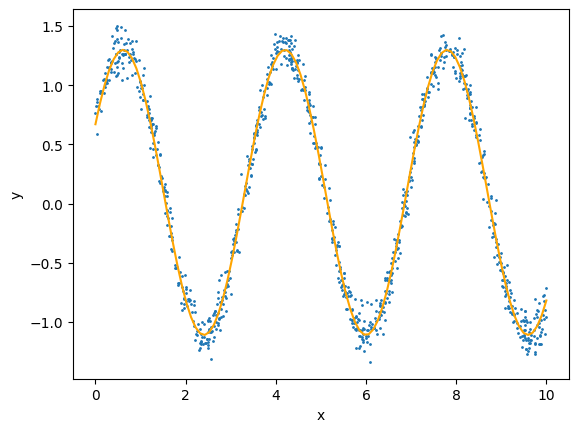

In [61]:
point_new = a[-1]
print(point_new)
x_values = np.linspace(0, 10, 100)
y_values = np.array([fitting_func(x,point_new) for x in x_values])
plt.scatter(spreadsheet.x, spreadsheet.y,s = 1)
plt.plot(x_values, y_values, color='orange')
plt.xlabel("x")
plt.ylabel("y")
plt.show() 

In this above graph, our fit line is shown in orange and the points from the given dataset are shown in blue. We see that the fitting algorithm does a good job at generating the fit curve. 

#### Residuals

<font color = blue>
    Next plot the residuals: for each data point, find the difference between the $y$-coordinate of the fit function and the data point.  (If there appears to be a pattern to the residuals, this usually means you missed something when you constructed your fit function, and may need to go back and try again.

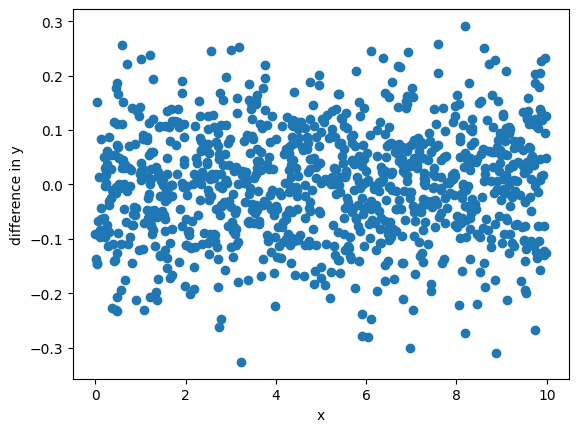

In [62]:
x_cords = np.array([x for x in spreadsheet.x])
y_cords = np.array([y for y in spreadsheet.y])
residuals = np.array([])
for i in range (len (x_cords)):
    residual = fitting_func(x_cords[i],point_new)-y_cords[i]
    #print(residual)
    residuals = np.append(residuals, residual)
    #print(residuals)
plt.scatter(x_cords,residuals)
plt.xlabel("x")
plt.ylabel("difference in y")
plt.show()

The above plot shows all the residual which is the difference between y coordinates of the fir and the data points. The fact that we do not see any pattern in the above graph means that our fitting algorithm has no known errors and has been approximated to our tolerance. 

### Estimating Uncertainty

<font color = blue>
    Then, find
    $$
    \tilde{\sigma} = \sqrt{\frac{\chi^2}{N}}
    $$
    evaluated at your fitting parameters.  Estimate the amount of measurement error present in the original experiment for each individual measurement.

In [63]:
math.sqrt(chi_squared(point_new)/len(x_cords))

0.1016881040199337

This calculation tells us that there is $\pm 0.101$ uncertainty for each point. This could just be the error recorded during the experiment.

# Any Other problem: The Feymar law (shortest path)

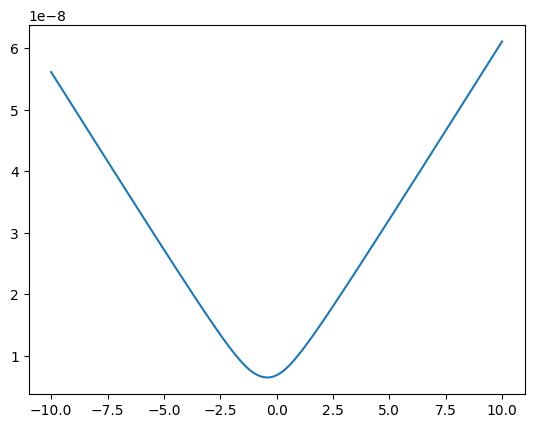

In [64]:
start = [0,0]
end = [2,-1]
boundary = [1]
refractive_index = [1.000293,1.333]

c = 3*(10**8)
def finding_shortest_path(x): # mathematical function to describe the shortest path tomn minimize time 
        return (np.sqrt((boundary[0]-start[0])**2+(x-start[1])**2)/(c*refractive_index[0]))+(np.sqrt((end[0]-boundary[0])**2 + (end[1]-x)**2)/(c*refractive_index[1]))
xvals = np.linspace(-10, 10, 1000)
yvals = np.array([finding_shortest_path(x) for x in xvals])
plt.plot(xvals, yvals)
plt.show()

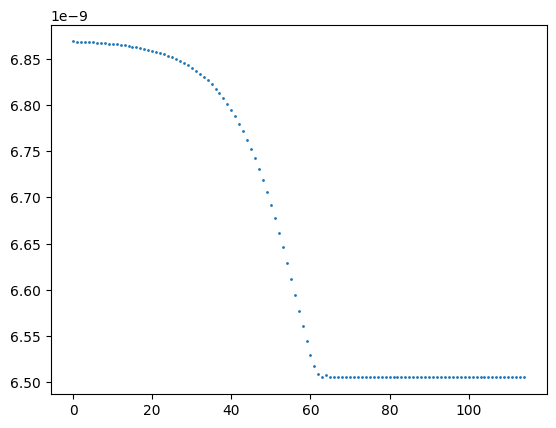

In [65]:
k, F_x,del_k = adaptive_stepping(finding_shortest_path, 0, 10**(-17), 10**(-4),1.1,0.5,10**(-6))

xvalues =  np.array([x for x in range(len(k))])
plt.scatter(xvalues, F_x,s = 1)
plt.show()

Feymar's law claims that light always takes the shortest path when traveling from point a to point b which would just be a straight line if both the points a and b were located in the same medium. On the other hand, if they at located in 2 different mediums, then we know that the shortest path would not be a straight line but inturn be 2 straight lines joint together as the speed of light changes as it transitions from one medium to the other. let us assume that our beam of light starts at point (0,0) i.e. point a which is located in air that has a refractive index of 1.000293 and has to travel to point b (2,-1) which is in water that has a refractive index 1.333. The boundary of these mediums is at x = 1. We want  to minimize the total time taken by the beam of light to go from point a to point b. This means we must find the shortest possible path. Keeping the above example in ming we cant try and minimize the y coordinate that light could pass through. The first graph in this section plots what the distance would be for various y values. We can try to run out minimizing algorithm on that mathematical function to find that the shortest part is made if the beam of crosses the boundary at point (1,-0.4115463727789757) for our given example. The second graph in this section shows that our adaptive stepping works at it plots the different y values for our desired coordinates vs the number of times it ran the steeping function. This above technique can be generalized for N barriers to find the shortest path for our light beam. 